<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C1W2_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load package
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
# Load fashion_mnist training data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();

3
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 

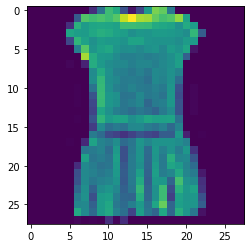

In [13]:
# Visualize data
import matplotlib.pyplot as plt
print(train_labels[3])
print(train_images[3])
plt.imshow(train_images[3])

In [0]:
# Data normalization
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
# Define callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
# Build the model
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
# Training the model
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.8821
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8971
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9021
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9057
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9099
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2320 - accuracy: 0.9141
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [27]:
# Prediction
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8896


[0.32478123903274536, 0.8895999789237976]

[7.3141121e-10 4.4298029e-12 7.6664836e-10 1.0227842e-13 2.6213670e-10
 1.0887386e-04 2.4430172e-08 5.8378000e-03 2.5820472e-09 9.9405330e-01]
9


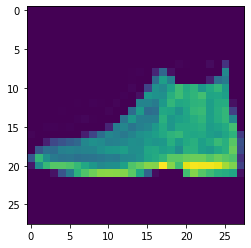

In [32]:
# Probability that the image being classifies is the corresponding item
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])  # Correct !
plt.imshow(test_images[0])

In [0]:
# Define same model by function
def model(train_images, train_labels, y_pred):
  model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
  
  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

  return model.predict(test_images)

In [35]:
prediction = model(train_images, train_labels, test_images)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4735 - accuracy: 0.8309
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2821 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9017
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9053
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2327 - accuracy: 0.9121
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [36]:
print(prediction[0])
print(test_labels[0])

[2.89008284e-08 9.67165931e-11 5.27006994e-10 4.16221529e-10
 1.04308236e-10 3.68533249e-04 4.34025011e-08 4.66508791e-03
 5.06680697e-09 9.94966328e-01]
9
